In [29]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [30]:
files = [file for file in os.listdir('./oneminutesmy22')]

mayo = pd.DataFrame()
for file in files:
  df = pd.read_csv('./oneminutesmy22/'+file)
  mayo = pd.concat([mayo, df]) 

In [31]:
mayo.head()

,TOA5,8543,CR1000X,8543.1,CR1000X.Std.05.01,CPU:Est_meteo1.CR1X,31786,OneMinute
0,TIMESTAMP,RECORD,Irradiance_Avg,T_amb_Avg,RH_Avg,P_atm_Avg,NaN,NaN
1,TS,RN,W/m^2,Deg C,%,mbar,NaN,NaN
2,NaN,NaN,Avg,Avg,Avg,Avg,NaN,NaN
3,2022-04-10 00:00:00,275927,0,12.67,70.3,754.1262,NaN,NaN
4,2022-04-10 00:01:00,275928,0,12.65,70.64,754.1227,NaN,NaN


# Arreglando la tabla

In [32]:
mayo.drop(mayo.index[0:3], axis = 0, inplace = True)
mayo.drop(['OneMinute', '31786'],axis='columns', inplace=True)

# Convirtiendolo a float

In [33]:
mayo = mayo.astype({'CR1000X': float, '8543.1':float, 'CR1000X.Std.05.01':float, 'CPU:Est_meteo1.CR1X':float,'8543':float})

# Sacando promedios

In [34]:
prom_rad = mayo['CR1000X'].mean()
prom_Tamb = mayo['8543.1'].mean()
prom_atm = mayo['CPU:Est_meteo1.CR1X'].mean()
proms_mayo = [prom_rad, prom_Tamb,prom_atm]
mayo.describe()

,8543,CR1000X,8543.1,CR1000X.Std.05.01,CPU:Est_meteo1.CR1X
count,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,284566.500000,265.047976,18.364408,42.700644,752.519308
std,12470.910151,363.159034,4.018080,18.837988,1.781426
min,262967.000000,0.000000,9.410000,10.750000,747.745200
25%,273766.750000,0.000000,15.340000,28.050000,751.202850
50%,284566.500000,9.390000,17.980000,39.290000,752.596700
75%,295366.250000,516.600000,21.500000,55.832500,753.829900
max,306166.000000,1255.000000,28.000000,98.400000,757.233100


In [35]:
mayo.to_csv('mayo22.csv', index=False)
mes = 'Mayo'
anio = '2022'

# Radiacion mayo

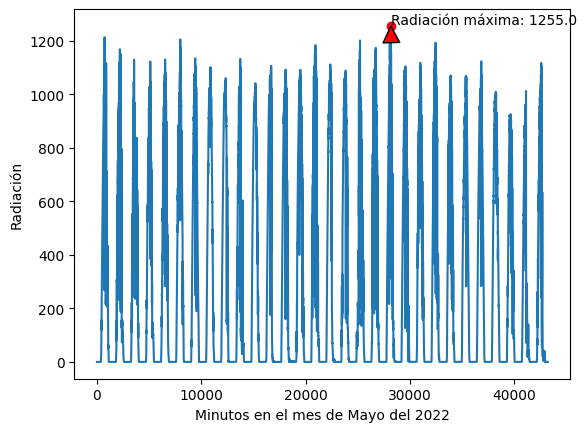

In [36]:
df = pd.read_csv("mayo22.csv")

plt.plot(df.index, df['CR1000X'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Radiación')
max_value = df['CR1000X'].max()
max_index = df['CR1000X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Radiación máxima: '+str(max_value), xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Temperatura Ambiente mayo

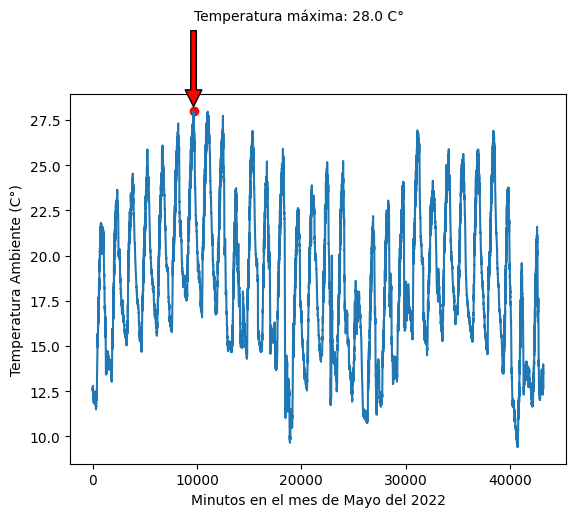

In [37]:

plt.plot(df.index, df['8543.1'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Temperatura Ambiente (C°)')
max_value = df['8543.1'].max()
max_index = df['8543.1'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Temperatura máxima: '+str(max_value)+ ' C°', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Presion mayo

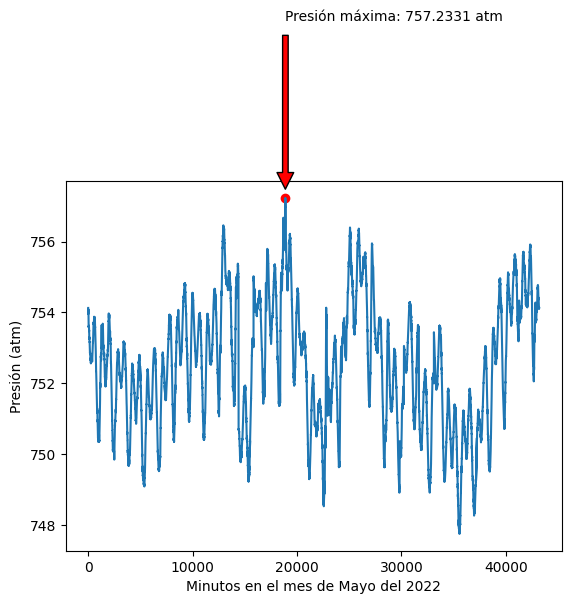

In [38]:

plt.plot(df.index, df['CPU:Est_meteo1.CR1X'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Presión (atm)')
max_value = df['CPU:Est_meteo1.CR1X'].max()
max_index = df['CPU:Est_meteo1.CR1X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Temperatura máxima')
plt.annotate('Presión máxima: '+str(max_value) + ' atm', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Haciendolo con un solo dia para ver la grafica


In [39]:
df = pd.read_csv('./oneminutesmy22/OneMinute_4_1_2022.txt')

In [40]:
df.drop(df.index[0:3], axis = 0, inplace = True)
df.drop(['OneMinute', '31786'],axis='columns', inplace=True)
df.head()

,TOA5,8543,CR1000X,8543.1,CR1000X.Std.05.01,CPU:Est_meteo1.CR1X
3,2022-04-01 00:00:00,262967,0,18.01,26.8,750.7125
4,2022-04-01 00:01:00,262968,0,18,26.86,750.7122
5,2022-04-01 00:02:00,262969,0,17.99,26.81,750.7238
6,2022-04-01 00:03:00,262970,0,17.96,26.83,750.7193
7,2022-04-01 00:04:00,262971,0,17.97,26.86,750.7061


In [41]:
df = df.astype({'CR1000X': float, '8543.1':float, 'CR1000X.Std.05.01':float, 'CPU:Est_meteo1.CR1X':float,'8543':float})

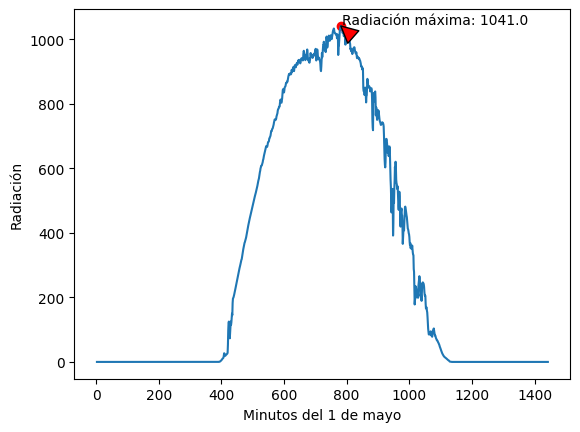

In [42]:

plt.plot(df.index, df['CR1000X'])

plt.xlabel('Minutos del 1 de mayo')
plt.ylabel('Radiación')
max_value = df['CR1000X'].max()
max_index = df['CR1000X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Radiación máxima: '+str(max_value), xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()